#Preliminary operations

In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns

In [2]:
# mont Google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df_data = pd.read_excel("drive/MyDrive/Progetto Data Mining 2/CODICE PROGETTO/Data Understanding and Preparation/DATASET PREPARED/df_prep_TRAIN.xlsx", index_col="Unnamed: 0")
X = df_data.values

In [4]:
df_data.head()

,sum,std,q25,q50,kur,skew,lag1_sum,lag1_kur,lag1_skew,zc_sum,...,mfcc_q95_w4,mfcc_q99_w4,mfcc_kur_w4,sc_std_w4,sc_kur_w4,sc_skew_w4,stft_sum_w4,stft_mean_w4,stft_q95_w4,stft_kur_w4
0,0.604904,-1.113727,1.155846,-0.064505,0.746422,1.597947,0.032809,0.526054,0.663058,-1.434221,...,-0.583254,-1.515480,-0.248903,-0.405919,3.146246,-1.505367,0.202942,1.325865,0.035922,3.971428
1,0.565092,-1.067513,1.155846,-0.064505,0.941449,1.648120,0.032809,0.186319,0.920248,-1.261744,...,-0.816861,-0.814428,0.141589,-0.408215,-0.236257,-0.713717,-0.120760,0.953175,0.035922,-0.381447
2,0.610689,-0.946842,1.891250,-0.064505,1.011526,1.770978,-0.885806,0.614675,0.111653,-1.673729,...,-0.514856,-1.120598,-0.095555,-0.227969,2.741296,-1.301205,-0.232259,1.008646,0.035922,2.877028
3,0.598277,-0.975367,1.155846,-0.064505,1.569306,1.970460,-0.696296,0.565900,0.856282,-1.352954,...,-0.059808,-0.706300,-0.404156,-0.535901,-0.469754,-0.612675,-0.537815,0.888896,0.035922,-0.307128
4,0.595865,-1.306279,1.155846,-0.064505,0.488840,1.426924,-0.696296,0.269613,0.151788,-1.499722,...,-0.503638,-0.784317,0.042496,-0.230801,0.600646,-0.701060,0.212217,0.950638,0.035922,1.797345


# Likelihood Approach

In [5]:
# definiamo la funzione norm_dist, che prende in input x, nu e sigma
def norm_dist(x, mu, sigma):
    # la funzione ritorna il risultato della seguente formula
    return 1/(np.sqrt(2*np.pi)*sigma) * np.e**(-((x-mu)**2)/(2*sigma**2))

# definiamo la funzione unif_dist, che prende in input x e n
def unif_dist(x, n):
    # la funzione ritorna il risultato della seguente formula
    return 1/n

In [6]:
# viene creata una copia M in formato np.array del dataset
M = np.copy(df_data)
# creo la trasposta del dataset (per iterare le features)
M_T = np.transpose(M)

In [7]:
# creiamo una lista vuota
As = np.empty((106, 0))

In [8]:
# viene calcolata la media di ogni feature
muMs = M.mean(axis=0)
muMs

array([ 3.49829574e-17, -1.47705820e-16,  1.39931830e-16, -3.88699527e-18,
        3.61490560e-16,  7.77399054e-18,  0.00000000e+00,  4.17851992e-16,
       -8.55138960e-17,  5.63614314e-16,  1.01061877e-16, -4.35343470e-16,
       -1.08835868e-15, -1.23217750e-15, -2.56541688e-16, -5.59727319e-16,
        1.94349764e-16,  6.99659149e-16, -1.05726271e-15,  1.18320136e-14,
        7.96834031e-16, -3.77038541e-16, -1.32157839e-16,  1.55479811e-17,
        2.21947430e-15,  1.17775957e-15, -2.28166622e-15, -8.88955819e-15,
       -7.77399054e-17, -3.34281593e-16, -9.71748818e-19,  5.44179338e-17,
        2.79863660e-16,  9.71748818e-19, -1.08835868e-16,  2.13784740e-17,
       -3.01242134e-17,  1.16609858e-17, -1.39931830e-16, -1.39931830e-16,
        2.33219716e-17, -8.70686941e-16,  0.00000000e+00,  1.76275236e-15,
        6.21919244e-17,  1.02616675e-15,  7.61851073e-16,  8.47364969e-16,
        3.88699527e-17,  5.51953329e-16, -7.77399054e-18,  3.49829574e-17,
       -1.55479811e-17,  

In [9]:
# viene calolata la std deviation di ogni feature
sigmaMs = M.std(axis=0)
sigmaMs

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1.])

In [10]:
# definisco lamba_par
lambda_par = 0.3
sizeAs = []
for A in As:
  sizeAs.append(len(A))

In [11]:
sumMs = []
for f, muM, sigmaM in zip(M_T, muMs, sigmaMs):
  sumMs.append(np.sum([norm_dist(x, muM, sigmaM) for x in f]))

In [12]:
sumAs = []
for A in As:
  sumAs.append(np.sum([unif_dist(x, sizeA) for x in A]))

In [13]:
lls = []
for f, A, sumM, sumA in zip(M_T, As, sumMs, sumAs):
  lls.append(len(f) * np.log(1-lambda_par) + sumM + len(A) * np.log(lambda_par) + sumA)

In [14]:
delta_lls = np.empty((106, 1828))
A = list()
c = 36
lambda_par = 0.3
z = 0

for col, f, ll in zip(df_data.columns, M_T, lls):
  print(z, col)

  for i, x in enumerate(f):
    A.append(x)

    M = np.array([xo for j, xo in enumerate(f) if i!=j])
    muM = np.mean(M)
    sigmaM = np.std(M)

    sizeA = len(A)

    sumM = np.sum([norm_dist(x, muM, sigmaM) for x in M])
    sumA = np.sum([unif_dist(x, sizeA) for x in A])

    ll_xi = (len(M) * np.log(1-lambda_par) + sumM + len(A) * np.log(lambda_par) + sumA)
    delta_ll = abs(ll - ll_xi)
    delta_lls[z][i] = delta_ll

    #if delta_ll > c:
      #print(i, delta_ll, 'outlier' )

    A = list()
  z += 1

0 sum
1 std
2 q25
3 q50
4 kur
5 skew
6 lag1_sum
7 lag1_kur
8 lag1_skew
9 zc_sum
10 zc_q95
11 mfcc_sum
12 mfcc_mean
13 mfcc_max
14 mfcc_q05
15 mfcc_q25
16 mfcc_q75
17 mfcc_q95
18 mfcc_kur
19 mfcc_skew
20 sc_sum
21 sc_mean
22 sc_std
23 sc_min
24 sc_max
25 sc_q25
26 stft_sum
27 stft_std
28 stft_min
29 stft_kur
30 sum_w1
31 std_w1
32 q25_w1
33 q50_w1
34 kur_w1
35 skew_w1
36 lag1_sum_w1
37 lag1_skew_w1
38 zc_sum_w1
39 zc_q99_w1
40 zc_kur_w1
41 mfcc_sum_w1
42 mfcc_max_w1
43 mfcc_q05_w1
44 mfcc_q25_w1
45 mfcc_q95_w1
46 mfcc_q99_w1
47 mfcc_kur_w1
48 sc_sum_w1
49 sc_std_w1
50 sc_kur_w1
51 sc_skew_w1
52 stft_min_w1
53 stft_kur_w1
54 sum_w2
55 q50_w2
56 lag1_sum_w2
57 lag1_q50_w2
58 zc_sum_w2
59 zc_q95_w2
60 mfcc_q95_w2
61 mfcc_kur_w2
62 sc_std_w2
63 sc_min_w2
64 stft_sum_w2
65 stft_std_w2
66 sum_w3
67 q50_w3
68 kur_w3
69 lag1_sum_w3
70 lag1_q50_w3
71 lag1_kur_w3
72 lag1_skew_w3
73 zc_sum_w3
74 zc_q95_w3
75 mfcc_q95_w3
76 mfcc_kur_w3
77 sc_std_w3
78 sc_min_w3
79 sc_kur_w3
80 stft_std_w3
81 sum_w4

In [15]:
delta_lls

array([[0.22097865, 0.23287213, 0.21920161, ..., 0.26127273, 0.29345212,
        0.26488224],
       [0.07780146, 0.09476238, 0.13779842, ..., 0.28732973, 0.31257023,
        0.28274567],
       [0.06434371, 0.06434371, 0.20856138, ..., 0.20856138, 0.06434371,
        0.06434371],
       ...,
       [0.01999174, 0.12603004, 0.10528811, ..., 0.3232706 , 0.31803695,
        0.31696092],
       [0.44480041, 0.44480041, 0.44480041, ..., 0.44480041, 0.44480041,
        0.44480041],
       [2.20543667, 0.35162184, 1.24936814, ..., 0.35504223, 0.36383018,
        0.32612971]])

In [ ]:
out_index = delta_lls.sort_values(ascending=False)[:18]
out_index

In [20]:
delta_lls_t = np.transpose(delta_lls)
df_delta_lls = pd.DataFrame(delta_lls_t, columns=df_data.columns)

In [31]:
# extract top 1% outliers
delta_lls_sum = np.sum(df_delta_lls, axis=1)
assert len(delta_lls_sum) == 1828, "wrong axis"

In [32]:
delta_lls_sum

0       32.613218
1       26.661167
2       26.590598
3       27.778535
4       27.383671
          ...    
1823    27.638813
1824    27.418867
1825    29.903592
1826    24.584672
1827    29.512139
Length: 1828, dtype: float64

In [33]:
out_index = delta_lls_sum.sort_values(ascending=False)[:18]
out_index

942     1.274210e+20
382     4.652209e+02
589     3.205491e+02
1704    1.221649e+02
311     1.004568e+02
308     9.903111e+01
1702    9.794432e+01
1367    9.613076e+01
324     9.590446e+01
314     9.517641e+01
1597    9.488131e+01
315     9.402959e+01
840     8.971768e+01
1703    8.923726e+01
1720    8.425628e+01
309     8.106893e+01
656     7.922796e+01
223     7.510973e+01
dtype: float64

In [34]:
df_delta_lls["score"] = np.median(df_delta_lls, axis=1)
df_delta_lls["outlier"] = 0
df_delta_lls.loc[np.sum(df_delta_lls, axis=1).sort_values(ascending=False)[:18].index, "outlier"] = 1

In [35]:
df_delta_lls.to_excel("df_delta_lls.xlsx")

#PCA

In [42]:
from sklearn.decomposition import PCA

In [43]:
pca = PCA(n_components=2)
pca.fit(X)
X_train_pca = pca.transform(X)

In [44]:
X_train_pca.shape

(1828, 2)

In [45]:
import matplotlib.pyplot as plt

In [46]:
X_train_pca

array([[-7.1475207 , -1.54921201],
       [-5.72913329,  0.92706715],
       [-7.25103664,  0.62495323],
       ...,
       [-4.63655479, -4.8902916 ],
       [-0.74315233, -5.02724152],
       [-2.41778824, -5.27670168]])

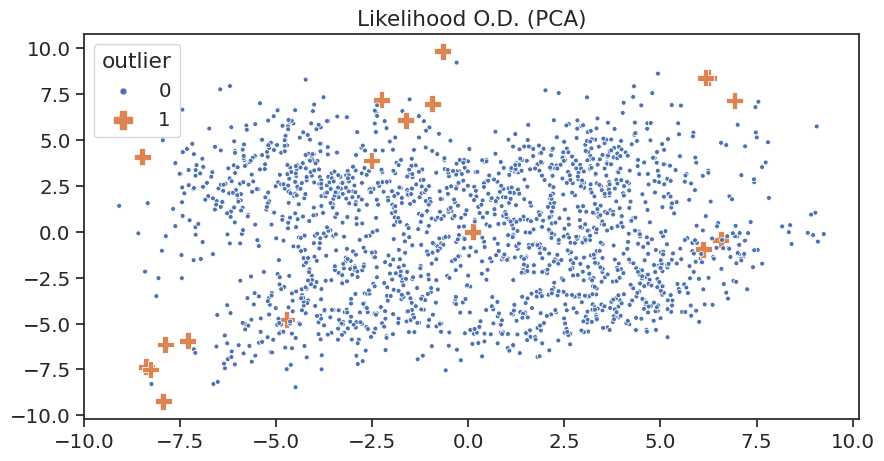

In [54]:
sns.set(rc={'figure.figsize':(10, 5)})
sns.set_style("ticks")
sns.set_context("notebook", font_scale=1.3)

sns.scatterplot(
    data=X_train_pca,
    x = X_train_pca[:, 0],
    y = X_train_pca[:, 1],
    size=df_delta_lls["outlier"], 
    hue=df_delta_lls["outlier"],
    sizes=(150, 50), 
    legend="full",
    style=df_delta_lls["outlier"],
    markers={0:".", 1:"P"}
).set(title="Likelihood O.D. (PCA)")

plt.savefig("likelihood_PCA.svg")

# t-SNE

In [ ]:
from sklearn.manifold import TSNE

In [ ]:
tsne = TSNE(n_components=2)
X_train_tsne = tsne.fit_transform(X)
X_train_tsne.shape

(1828, 2)

<Axes: >

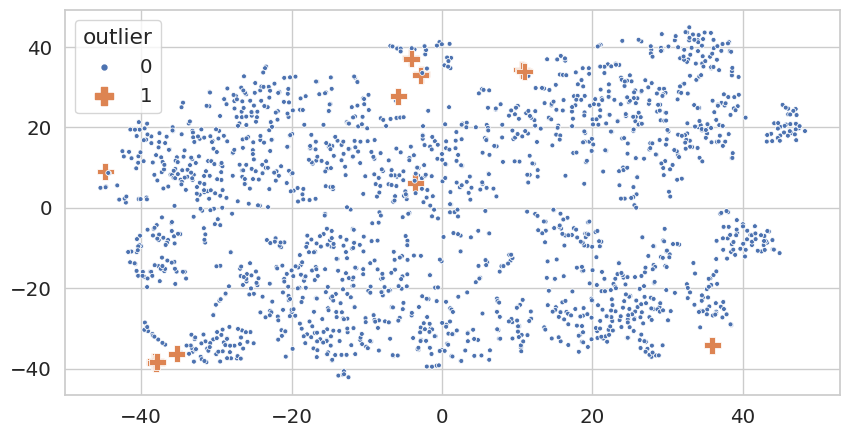

In [ ]:
sns.set(rc={'figure.figsize':(10, 5)})
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1.3)

sns.scatterplot(
    data=X_train_tsne,
    x = X_train_tsne[:, 0],
    y = X_train_tsne[:, 1],
    size=df_delta_lls["outlier"], 
    hue=df_delta_lls["outlier"],
    sizes=(150, 50), 
    legend="full",
    style=df_delta_lls["outlier"],
    markers={0:".", 1:"P"}
)

# Random Subspace Projection

In [48]:
from sklearn import random_projection

In [49]:
rsp = random_projection.GaussianRandomProjection(n_components=2, random_state=0)
X_train_rsp = rsp.fit_transform(X)
X_train_rsp.shape

(1828, 2)

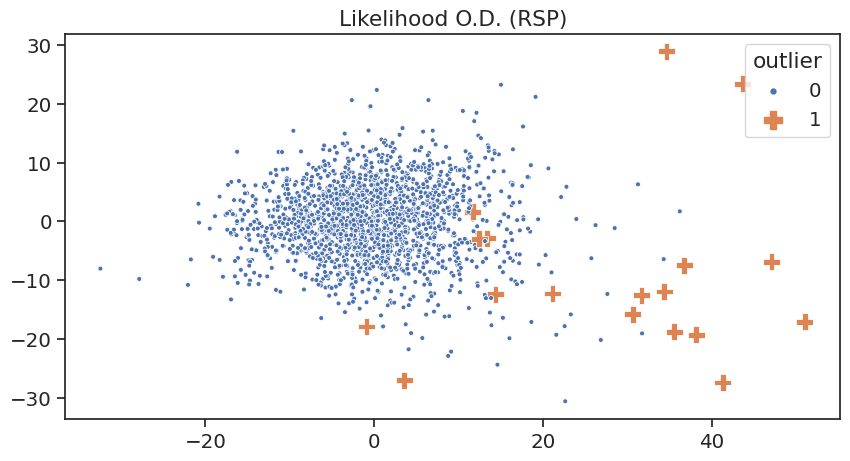

In [53]:
sns.set(rc={'figure.figsize':(10, 5)})
sns.set_style("ticks")
sns.set_context("notebook", font_scale=1.3)

sns.scatterplot(
    data=X_train_rsp,
    x = X_train_rsp[:, 0],
    y = X_train_rsp[:, 1],
    size=df_delta_lls["outlier"], 
    hue=df_delta_lls["outlier"],
    sizes=(150, 50), 
    legend="full",
    style=df_delta_lls["outlier"],
    markers={0:".", 1:"P"}
).set(title="Likelihood O.D. (RSP)")

plt.savefig("likelihood_RSP.svg")

# IsoMap

In [ ]:
from sklearn.manifold import Isomap

In [ ]:
iso = Isomap(n_components=2)
X_train_iso = iso.fit_transform(X)
X_train_iso.shape

(1828, 2)

<Axes: >

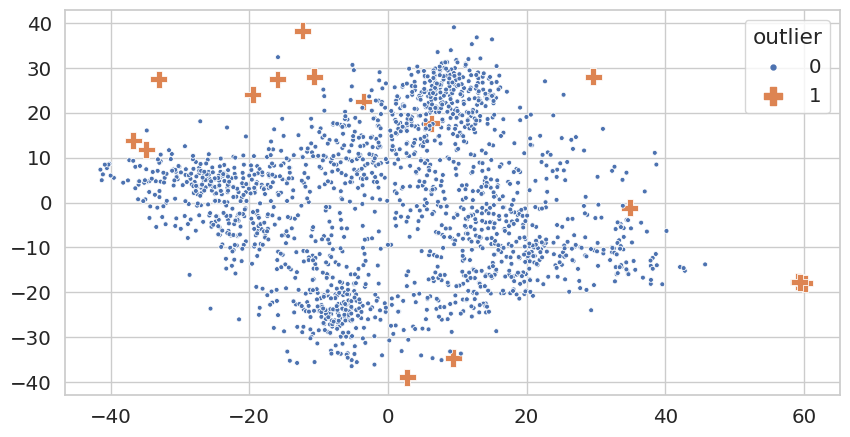

In [ ]:
sns.set(rc={'figure.figsize':(10, 5)})
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1.3)

sns.scatterplot(
    data=X_train_iso,
    x = X_train_iso[:, 0],
    y = X_train_iso[:, 1],
    size=df_delta_lls["outlier"], 
    hue=df_delta_lls["outlier"],
    sizes=(150, 50), 
    legend="full",
    style=df_delta_lls["outlier"],
    markers={0:".", 1:"P"}
)